In [1]:
from utils.task import add_task_identity, get_input
from utils.analysis import get_all_hiddens, get_attractors, plot_pca, get_speed
from utils.model import MultitaskRNN, plot_behavior
from utils.utils import get_model, get_fixed_points

import torch
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import os
os.environ['KMP_WARNINGS'] = '0'

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Network behavior

[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


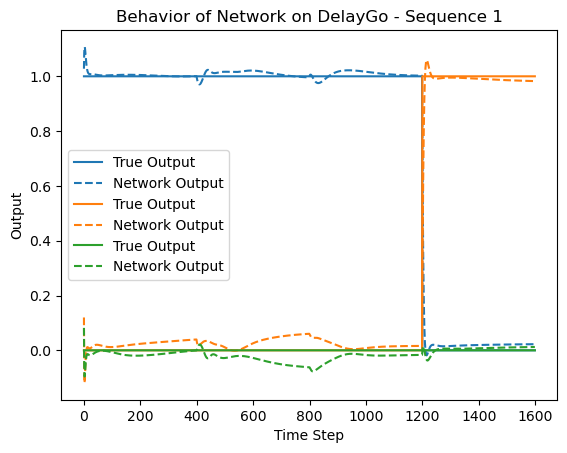

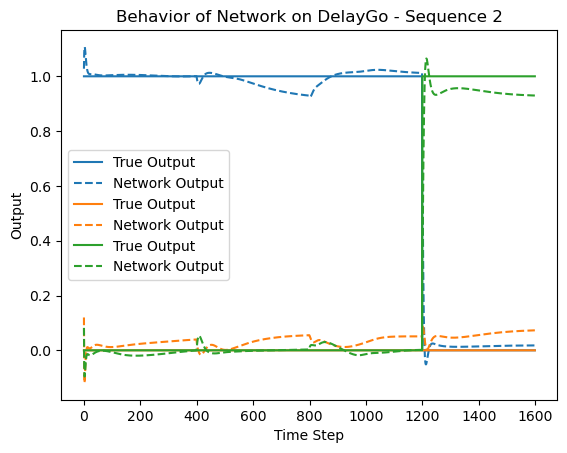

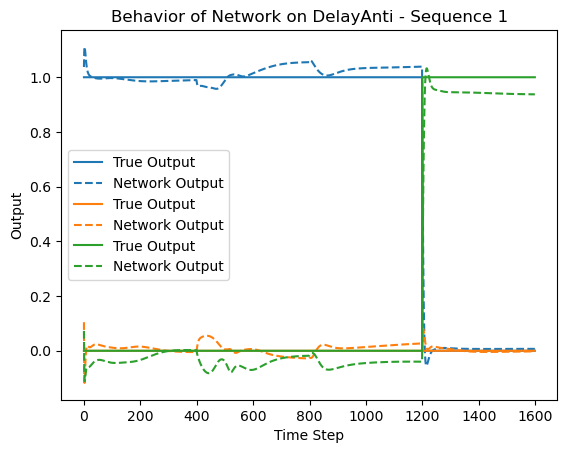

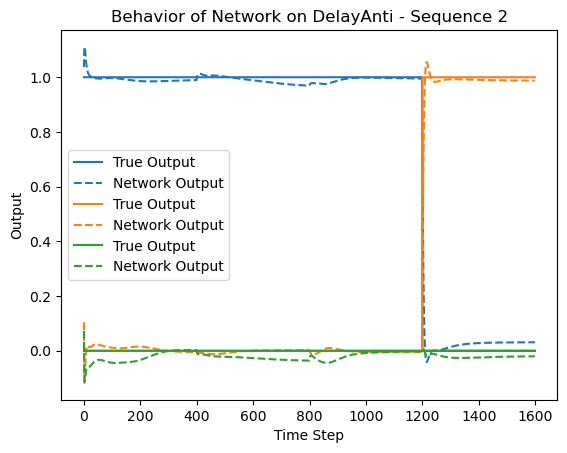

In [2]:
model_name = "delaygo_delayanti_255"
rnn, tasks = get_model(model_name)

period_duration=400
plot_behavior(rnn, tasks, period_duration=period_duration)

# Fixed Points

In [6]:
all_hiddens = get_all_hiddens(rnn, tasks)

period = "delay"
stimulus = 2
task_idx = 0

input = add_task_identity(tasks[task_idx].get_input(period, stimulus), task_idx, len(tasks))
input

tensor([1., 0., 0., 1., 0.])

## Find Fixed Points

In [4]:
input = get_input(0, 'delay', 1, tasks)
fps = get_fixed_points(model_name, input)

In [5]:
get_speed(rnn, input, fps)

tensor([5.8629e-08, 1.4288e-08, 4.6808e-09, 4.7014e-09, 1.4557e-08, 4.5531e-09,
        4.3456e-09, 4.9292e-10, 1.4843e-08, 1.3061e-09, 1.3111e-08, 2.9732e-09,
        1.1495e-08, 2.0902e-08, 2.2722e-09, 1.5365e-08, 4.6510e-08, 9.8402e-10,
        1.4822e-08, 4.3807e-09, 1.5113e-08, 1.5860e-09, 2.5105e-09, 2.6946e-10,
        1.5184e-08, 1.3710e-08, 1.0653e-08, 6.5055e-10, 4.8127e-09, 1.4581e-08,
        2.8159e-08, 7.1107e-09, 4.7604e-09, 6.5055e-10, 2.0221e-08, 2.8970e-09,
        8.5688e-09, 1.4888e-08, 9.8689e-09, 1.4717e-08, 3.5887e-07, 4.3200e-09,
        2.7729e-09, 6.2246e-08, 2.1432e-09, 1.2933e-08, 1.4185e-08, 2.0595e-09,
        3.1809e-08, 1.3210e-08, 1.2414e-09, 1.7341e-08, 6.9798e-09, 4.9736e-09,
        2.3676e-09, 3.3886e-08, 1.5041e-08, 6.4271e-09, 3.9012e-09, 4.8806e-09,
        2.7366e-08, 6.7965e-10, 3.2645e-08, 2.3387e-08, 6.4599e-09, 3.3473e-08,
        3.6709e-09, 3.5671e-08, 8.5745e-09, 2.5263e-09, 1.0636e-08, 4.5226e-08,
        3.8586e-09, 2.7699e-08, 7.4613e-

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


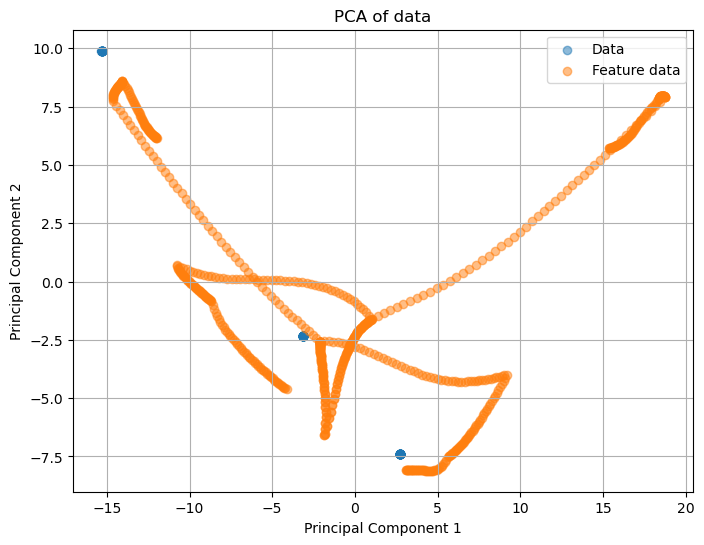

In [6]:
plot_pca(fps.detach().numpy(), all_hiddens.detach().numpy(), True)

## Attractors

In [7]:
all_hiddens = get_all_hiddens(rnn, tasks)

In [8]:
num_timesteps = 1000
num_last = 100

task_idx = [0,0]
period = ["fix", "stim"]
stimulus = [1, 1]

input1 = get_input(task_idx[0], period[0], stimulus[0], tasks)
input2 = get_input(task_idx[1], period[1], stimulus[1], tasks)

n_interp = 20
i = 2
interpolated_input = (n_interp - i)/n_interp * input1 + (i/n_interp) * input2
print(interpolated_input)

tensor([1.0000, 0.1000, 0.0000, 1.0000, 0.0000])


In [9]:
attractors = get_attractors(rnn, interpolated_input, all_hiddens, num_timesteps, num_last)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


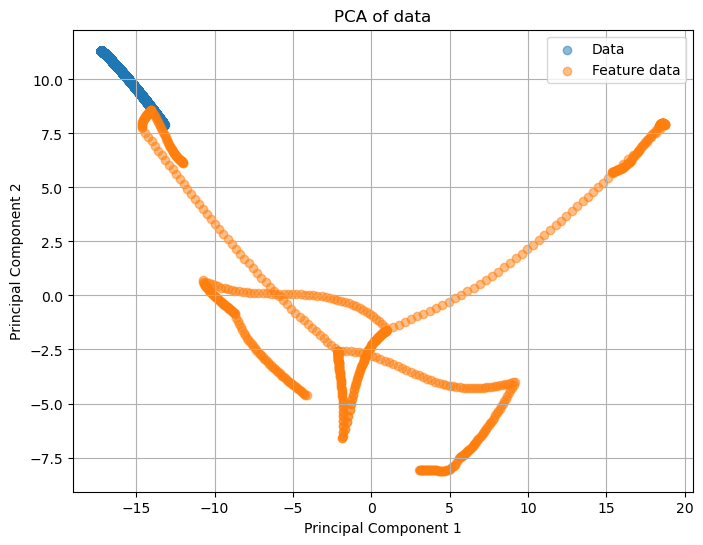

In [10]:
attractors_2d = attractors.reshape(-1, attractors.shape[-1])
plot_pca(attractors_2d.detach().numpy(), all_hiddens.detach().numpy(), plot_feature_data=True)  # convert tensors to numpy arrays for use with sklearn

In [23]:
get_speed(rnn, interpolated_input, attractors[0,:,:])

tensor([7.4635e-08, 7.1473e-08, 6.9079e-08, 6.7068e-08, 6.4691e-08, 6.2948e-08,
        6.0974e-08, 5.8854e-08, 5.6849e-08, 5.4906e-08, 5.3241e-08, 5.1477e-08,
        5.0007e-08, 4.8410e-08, 4.7026e-08, 4.5543e-08, 4.4393e-08, 4.3034e-08,
        4.1549e-08, 4.0235e-08, 3.9060e-08, 3.7694e-08, 3.6574e-08, 3.5626e-08,
        3.4252e-08, 3.3089e-08, 3.2206e-08, 3.1321e-08, 3.0294e-08, 2.9367e-08,
        2.8305e-08, 2.7433e-08, 2.6493e-08, 2.5525e-08, 2.4964e-08, 2.4033e-08,
        2.3311e-08, 2.2523e-08, 2.1818e-08, 2.0965e-08, 2.0268e-08, 1.9548e-08,
        1.8861e-08, 1.8263e-08, 1.7634e-08, 1.7046e-08, 1.6332e-08, 1.5797e-08,
        1.5549e-08, 1.5062e-08, 1.4493e-08, 1.4028e-08, 1.3625e-08, 1.3284e-08,
        1.2868e-08, 1.2357e-08, 1.1970e-08, 1.1587e-08, 1.1179e-08, 1.0900e-08,
        1.0442e-08, 1.0211e-08, 9.7635e-09, 9.4452e-09, 9.1713e-09, 8.8723e-09,
        8.7434e-09, 8.3881e-09, 8.2014e-09, 7.9548e-09, 7.7419e-09, 7.4008e-09,
        7.2406e-09, 6.9592e-09, 6.6708e-

## Minimize speed for interpolated input

In [24]:
from utils.analysis import minimize_speed

In [26]:
lr = 0.1
q_thresh = 1e-6
max_iterations = 10000

sample_proportion = 0.1 

# Determine the number of samples from the proportion of hidden states
hidden_state_count = all_hiddens.size(0)
num_samples = int(hidden_state_count * sample_proportion)  # Calculate the number of samples

# Randomly permute the indices and select the first num_samples
indices = torch.randperm(hidden_state_count)[:num_samples]  
sampled_hiddens = all_hiddens[indices]  # Select the sampled hidden points using the sampled indices

In [ ]:
fps = minimize_speed(rnn, interpolated_input, all_hiddens, lr, q_thresh, max_iterations=max_iterations)